## Power Analysis

Working tutorial from:

https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

* **Statistical power** is the probability of detecting an effect given an effect exists
  + Calculated before an experiment to estimate require sample size
    * typically a power of 0.80 or better is desired
  + Calculated after an experiment to comment on confidence of results
<br><br>
* **Power analysis** estimates one of the four following parameters give the other three
  + Effect size - magnitude
    * i.e. Pearson’s correlation between variables
    * i.e. Cohen's d between groups
  + Sample size - number of observations
  + Significance - probability of rejecting the null if it is true P(false positive)
  + Power - probability of rejecting the null if it is false P(1 - false negative)
<br><br>
* **statsmodels** python module
  + classes for power calculations
    * TTestIndPower - for independent student's t-test
    * TTestPower - for paired student's t-test
    * See documentation for F-test, Z-test, Chi-Squared test and others
  + solve_power() function
    * Calculates one of the four parameters if set to None
    * Note, use the ratio argument if the size of the second sample is expected to be different
  + plot_power() function
    * Generate power curves

In [9]:
# Estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

alpha = 0.05
power = 0.80
effect = 0.80   # Cohen's d for large effect
n_obs = None   # unknown to be calculated

analysis = TTestIndPower()
result = analysis.solve_power(effect, n_obs, alpha, power, ratio=1.0)
print('Minimum sample size: {0:.0f}'.format(np.ceil(result)))

Minimum sample size: 26


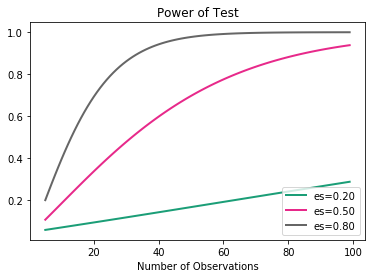

In [15]:
# Plot power curves for varying sample and effect size
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
alpha = 0.05

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes,
                    alpha=alpha)
plt.show()